In [2]:
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.express as px
import warnings
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
df = pd.read_csv('heart.csv')

# Data Preprocessing

In [4]:
conty = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
catty = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

In [5]:
# Convert categorical variables into dummy/indicator variables.
# Each variable is converted into as many 0/1 variables as there 
# are different values. Columns in the output are each named after a value
df1 = pd.get_dummies(df, columns=catty, drop_first=True)

In [6]:
df1

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
299,45,110,264,132,1.2,0,True,False,False,True,...,False,True,False,False,False,False,False,False,False,True
300,68,144,193,141,3.4,0,True,False,False,False,...,False,True,False,False,True,False,False,False,False,True
301,57,130,131,115,1.2,0,True,False,False,False,...,True,True,False,True,False,False,False,False,False,True


In [7]:
df1.describe()

,age,trtbps,chol,thalachh,oldpeak,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


In [8]:
# Indentifying features and target
x = df1.drop(['output'],axis=1)
y = df[['output']]

In [9]:
scaler = RobustScaler()

# scaling the continuous featuree
x[conty] = scaler.fit_transform(x[conty])
print("The first 5 rows of x are")
x.head()

The first 5 rows of x are


,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.333333,0.00,0.157480,1.046154,1.6875,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.037037,0.00,-0.566929,0.584615,0.3750,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.074074,-0.50,-0.062992,0.769231,0.0000,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.148148,-0.50,1.795276,0.307692,-0.1250,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", x_train.shape)
print("The shape of X_test is       ",x_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


# Modeling

## 1. Linear Classifiers

## 1.1. Support Vector Machines (SVM)

In [11]:
clf = SVC(kernel='linear', C=1, random_state=42).fit(x_train,y_train) #Regularization parameter. 
#The strength of the regularization is inversely proportional to C. Must be strictly positive. 
#The penalty is a squared l2 penalty.

# predicting the values
y_pred = clf.predict(x_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.8688524590163934


### 1.1.1 Hyperparameter tuning of SVC

In [12]:
# instantiating the object
svm = SVC()

# setting a grid 
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}
# gamme is Kernel coefficient. if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma.

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(x_train, y_train)

# the scores
print("The best params are :", searcher.best_params_) #Parameter setting that gave the best results on the hold out data.
print("The best score is   :", searcher.best_score_) # is the average of all cross validation (cv) folds for a single 
#combination of the parameters you specify in the parameters dictionary.

# predicting the values
y_pred = searcher.predict(x_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

The best params are : {'C': 3, 'gamma': 0.1}
The best score is   : 0.8384353741496599
The test accuracy score of SVM after hyper-parameter tuning is  0.9016393442622951


## 1.2 Logistic Regression

In [13]:
# Instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(x_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(x_test)

# Finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# Printing the test accuracy
print("The test accuracy score of Logistic Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistic Regression is  0.9016393442622951


### 1.2.1 ROC Curve

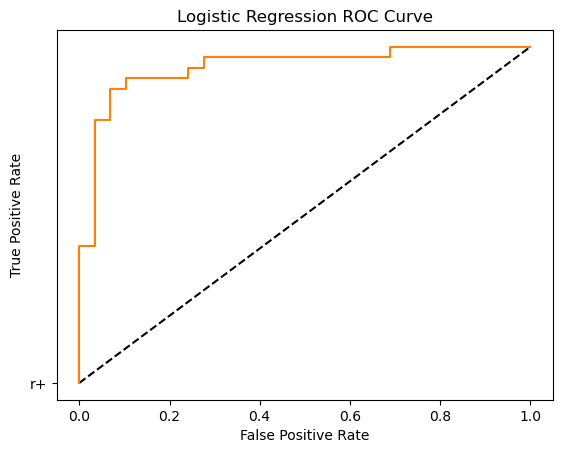

In [14]:
# calculating the probabilities
y_pred_prob = logreg.predict_proba(x_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

## 1.3 All the Trees

### 1.3.1 Decision Tree

In [15]:
# Instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(x_train, y_train)

# Calculating the predictions
y_pred = dt.predict(x_test)

# Printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree is  0.7213114754098361


### 1.3.2 Random Forest

In [16]:
# Instantiating the object
rf = RandomForestClassifier(random_state = 42)

# fitting the model
rf.fit(x_train, y_train)

# Calculating the predictions
y_pred = rf.predict(x_test)

# Printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest is  0.8524590163934426


### 1.3.3 Gradient Boosting Classifier (without tuning)

In [17]:
# Instantiating the object
gbc = GradientBoostingClassifier(random_state = 42)

# fitting the model
gbc.fit(x_train, y_train)

# Calculating the predictions
y_pred = gbc.predict(x_test)

# Printing the test accuracy
print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Gradient Boosting Classifier is  0.7868852459016393


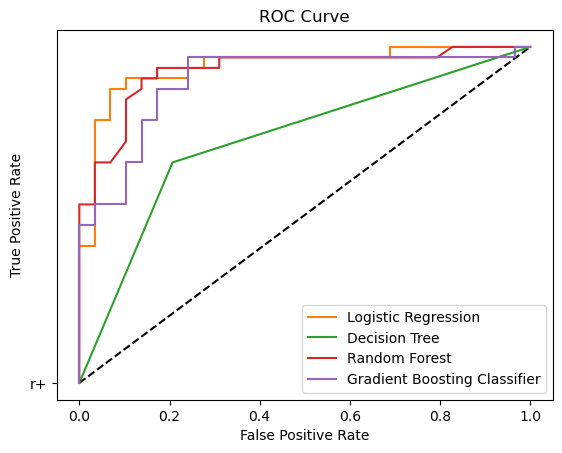

In [21]:
# calculating the probabilities
y_pred_prob_lr = logreg.predict_proba(x_test)[:,1]
#y_pred_prob_svc = clf.predict_proba(x_test)[:,1]
y_pred_prob_dt = dt.predict_proba(x_test)[:,1]
y_pred_prob_rf = rf.predict_proba(x_test)[:,1]
y_pred_prob_gbc = gbc.predict_proba(x_test)[:,1]

# instantiating the roc_cruve
fpr_lr,tpr_lr,threshold_lr = roc_curve(y_test,y_pred_prob_lr)
#fpr_svc,tpr_svc,threshold_svc = roc_curve(y_test, y_pred_prob_svc)
fpr_rf,tpr_rf,threshold_rf = roc_curve(y_test, y_pred_prob_rf)
fpr_gbc,tpr_gbc,threshold_gbc = roc_curve(y_test, y_pred_prob_gbc)
fpr_dt,tpr_dt,threshold_dt = roc_curve(y_test, y_pred_prob_dt)


# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr_lr,tpr_lr,label='Logistic Regression')
#plt.plot(fpr_svc,tpr_svc,label='SVC')
plt.plot(fpr_dt,tpr_dt,label='Decision Tree')
plt.plot(fpr_rf,tpr_rf,label='Random Forest')
plt.plot(fpr_gbc,tpr_gbc,label='Gradient Boosting Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [23]:
#Result
y_test


,output
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0
